In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils import api_requests as req
from utils import funciones as func

En este documento voy a limpiar las columnas que he escogido y voy a ir aplicándoles feature engineering directamente, como la imputación de nulos, one-hot o labeling encoding entre otras cosas.

In [2]:
#Lo cargamos desde el fichero
df = pd.read_csv("../data/dataCards.csv")
#Lo miramos para ver que está bonito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96739 entries, 0 to 96738
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            96739 non-null  object 
 1   released_at     96739 non-null  object 
 2   layout          96739 non-null  object 
 3   mana_cost       80585 non-null  object 
 4   cmc             96664 non-null  float64
 5   type_line       96664 non-null  object 
 6   oracle_text     92259 non-null  object 
 7   colors          93319 non-null  object 
 8   color_identity  96739 non-null  object 
 9   keywords        96739 non-null  object 
 10  produced_mana   14805 non-null  object 
 11  legalities      96739 non-null  object 
 12  reserved        96739 non-null  bool   
 13  game_changer    96739 non-null  bool   
 14  foil            96739 non-null  bool   
 15  nonfoil         96739 non-null  bool   
 16  promo           96739 non-null  bool   
 17  reprint         96739 non-null 

In [3]:
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,False,True,common,False,True,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,False,True,common,False,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


## Antes de nada vamos a eliminar todas las que sean Token o tipos especiales raros

In [4]:
df = df.dropna(subset=['type_line'])

In [5]:
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,False,True,common,False,True,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,False,True,common,False,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [6]:
df[df["type_line"].str.contains("Token")]

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,False,True,common,False,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
34,Bird,2024-04-19,token,NaN,0.0,Token Creature — Bird,Flying,['U'],['U'],['Flying'],...,False,True,common,False,False,False,1,1,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
63,Wolf,2021-11-19,token,NaN,0.0,Token Creature — Wolf,NaN,['R'],['R'],[],...,False,False,common,False,True,False,3,2,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
149,Copy,2025-01-01,token,NaN,0.0,Token,(This token can be used to represent a token t...,[],[],[],...,False,True,common,False,False,False,NaN,NaN,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
155,Insect,2016-04-08,token,NaN,0.0,Token Creature — Insect,NaN,['G'],['G'],[],...,False,True,common,False,False,True,1,1,NaN,"{'usd': '0.18', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96403,Goblin,2014-12-05,token,NaN,0.0,Token Creature — Goblin,NaN,['R'],['R'],[],...,False,True,common,False,False,False,1,1,NaN,"{'usd': '0.28', 'usd_foil': None, 'usd_etched'..."
96420,Elf Warrior,2020-11-20,token,NaN,0.0,Token Creature — Elf Warrior,NaN,['G'],['G'],[],...,False,True,common,False,True,False,1,1,NaN,"{'usd': '0.30', 'usd_foil': None, 'usd_etched'..."
96506,Elemental,2023-09-08,token,NaN,0.0,Token Creature — Elemental,NaN,"['U', 'W']","['U', 'W']",[],...,False,False,common,False,False,False,4,4,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
96579,Angel,2022-02-18,token,NaN,0.0,Token Creature — Angel,"Flying, vigilance",['W'],['W'],"['Flying', 'Vigilance']",...,False,True,common,False,False,False,4,4,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."


In [7]:
df = df[~df["type_line"].str.contains("Token", na=False)]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,False,True,common,False,True,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,False,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [8]:
106299 - 2535

103764

In [9]:
df = df[(df['layout'] != 'token')]
df = df[(df['layout'] != 'double_faced_token')]
df = df[(df['layout'] != 'art_series')]
df = df[(df['layout'] != 'planar')]
df = df[(df['layout'] != 'emblem')]
df = df[(df['layout'] != 'host')]
df = df[(df['layout'] != 'vanguard')]
df = df[(df['layout'] != 'scheme')]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,False,True,common,False,True,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,False,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [10]:
#Vamos bien limpiando, sin tokens

## Ahora voy a expoliar las tierras básicas

In [11]:
tierras = df[df["type_line"].str.contains("Basic")]

In [12]:
tierras[~tierras["type_line"].str.contains("Land")]

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
19949,Omnipresent Impostor,2024-08-02,normal,{2},2.0,Basic Creature — Shapeshifter,Changeling\nOmnipresent Impostor has all card ...,[],[],['Changeling'],...,False,False,rare,False,False,False,2,1,NaN,"{'usd': '0.37', 'usd_foil': None, 'usd_etched'..."


In [13]:
#De esta carta podemos prescindir, no aporta nada

In [14]:
100577 - 4453

96124

In [15]:
df = df[~df["type_line"].str.contains("Basic", na=False)]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,False,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
6,Wastewood Verge,2025-02-14,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],...,True,True,rare,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [16]:
#Vamos a quitar los stickers
df = df[~df["type_line"].str.contains("Stickers", na=False)]
df = df[~df["type_line"].str.contains("Conspiracy", na=False)]
df = df[~df["type_line"].str.contains("Summon", na=False)]
df = df[~df["type_line"].str.contains("Tribal", na=False)]
df = df[df['name'] != 'Atinlay Igpay']
df = df[df['name'] != 'Miss Demeanor']
df = df[df['type_line'] != 'Card']
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,promo,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,False,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,False,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,False,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,False,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
6,Wastewood Verge,2025-02-14,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],...,True,True,rare,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,False,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
96735,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,False,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
96736,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,False,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
96737,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,False,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


## Tratamos released_at

In [17]:
df['released_at'] = pd.to_datetime(df['released_at'], errors='coerce')
df['released_year'] = df['released_at'].dt.year
df.drop(columns="released_at", inplace=True)

df

,name,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,...,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year
1,Fury Sliver,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,...,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006
2,Kor Outfitter,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,...,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009
4,Siren Lookout,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,...,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017
5,Web,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,...,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994
6,Wastewood Verge,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']",...,True,rare,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,...,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024
96735,Horned Troll,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,...,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003
96736,Faerie Bladecrafter,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,...,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023
96737,Exultant Skymarcher,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,...,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018


## Tratamos Layout

In [18]:
#Primero estudiamos un poco layout

print(df["layout"].unique())
print(df["layout"].nunique())

['normal' 'adventure' 'transform' 'split' 'mutate' 'modal_dfc' 'meld'
 'saga' 'class' 'augment' 'case' 'flip' 'leveler' 'prototype']
14


C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2739885017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layout_counts.values, y=layout_counts.index, palette='viridis')


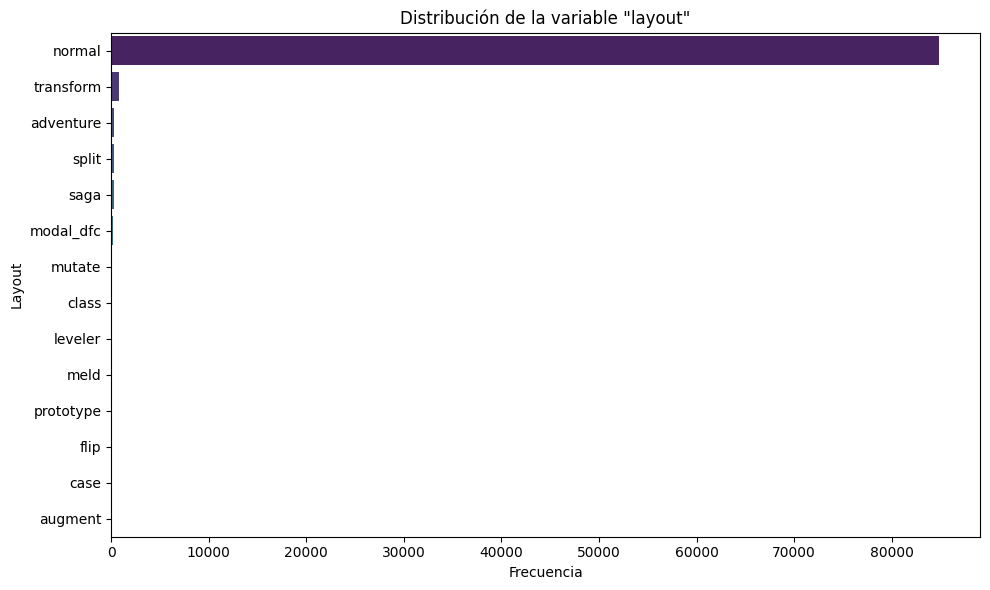

In [19]:
layout_counts = df['layout'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=layout_counts.values, y=layout_counts.index, palette='viridis')
plt.title('Distribución de la variable "layout"')
plt.xlabel('Frecuencia')
plt.ylabel('Layout')
plt.tight_layout()
plt.show()

In [20]:
#Casi todos son "normal", asi que vamos a garcharnos la columna. No me vale ni para decir si es o no normal
df.drop(columns="layout", axis=1, inplace=True)
df

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year
1,Fury Sliver,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,uncommon,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006
2,Kor Outfitter,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,common,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009
4,Siren Lookout,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,common,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017
5,Web,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,True,rare,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994
6,Wastewood Verge,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",...,True,rare,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,rare,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024
96735,Horned Troll,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,True,common,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003
96736,Faerie Bladecrafter,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,rare,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023
96737,Exultant Skymarcher,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,common,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018


## Ahora vamos con el mana_cost y cmc

In [21]:
df[df["mana_cost"].isnull()]

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year
6,Wastewood Verge,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",...,True,rare,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
32,Orzhov Guildgate,NaN,0.0,Land — Gate,This land enters tapped.\n{T}: Add {W} or {B}.,[],"['B', 'W']",[],"['B', 'W']","{'standard': 'legal', 'future': 'legal', 'hist...",...,False,common,False,False,True,NaN,NaN,1566.0,"{'usd': '0.10', 'usd_foil': '0.93', 'usd_etche...",2013
89,Thornwood Falls,NaN,0.0,Land,This land enters tapped.\nWhen this land enter...,[],"['G', 'U']",[],"['G', 'U']","{'standard': 'legal', 'future': 'legal', 'hist...",...,True,common,False,False,True,NaN,NaN,872.0,"{'usd': '0.12', 'usd_foil': '0.18', 'usd_etche...",2016
98,Eldrazi Temple,NaN,0.0,Land,{T}: Add {C}.\n{T}: Add {C}{C}. Spend this man...,[],[],[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",...,True,rare,False,True,False,NaN,NaN,1500.0,"{'usd': '86.78', 'usd_foil': '106.87', 'usd_et...",2022
134,Ancient Spring,NaN,0.0,Land,"This land enters tapped.\n{T}: Add {U}.\n{T}, ...",[],"['B', 'U', 'W']",[],"['B', 'U', 'W']","{'standard': 'not_legal', 'future': 'not_legal...",...,False,common,False,False,True,NaN,NaN,19199.0,"{'usd': '0.14', 'usd_foil': '2.89', 'usd_etche...",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96660,Vineglimmer Snarl,NaN,0.0,Land,"As this land enters, you may reveal a Forest o...",[],"['G', 'U']",[],"['G', 'U']","{'standard': 'not_legal', 'future': 'not_legal...",...,True,rare,False,False,False,NaN,NaN,539.0,"{'usd': '1.32', 'usd_foil': '1.88', 'usd_etche...",2021
96693,"Svogthos, the Restless Tomb",NaN,0.0,Land,"{T}: Add {C}.\n{3}{B}{G}: Until end of turn, t...",[],"['B', 'G']",[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",...,True,uncommon,False,False,False,NaN,NaN,9506.0,"{'usd': '0.39', 'usd_foil': None, 'usd_etched'...",2018
96700,Serpentine,NaN,0.0,Creature — Wurm,"Landfall — Whenever a land you control enters,...",['G'],['G'],"['Augment', 'Landfall']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,True,rare,False,False,False,+3,+3,NaN,"{'usd': None, 'usd_foil': '0.19', 'usd_etched'...",2022
96719,Unknown Shores,NaN,0.0,Land,"{T}: Add {C}.\n{1}, {T}: Add one mana of any c...",[],[],[],"['B', 'C', 'G', 'R', 'U', 'W']","{'standard': 'not_legal', 'future': 'not_legal...",...,False,common,False,False,True,NaN,NaN,6813.0,"{'usd': '0.05', 'usd_foil': '0.35', 'usd_etche...",2013


In [22]:
df["produced_mana"].fillna("0")

1                 0
2                 0
4                 0
5                 0
6        ['B', 'G']
            ...    
96734             0
96735             0
96736             0
96737             0
96738             0
Name: produced_mana, Length: 87192, dtype: object

In [23]:
df["cmc"].isnull().sum()

0

In [24]:
df["cmc"].describe()

count      87192.000000
mean          26.078212
std         4789.308997
min            0.000000
25%            2.000000
50%            3.000000
75%            4.000000
max      1000000.000000
Name: cmc, dtype: float64

In [25]:
df[df["cmc"] == 1000000.0]

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year
16006,Gleemax,{1000000},1000000.0,Legendary Artifact,You choose all targets for all spells and abil...,[],[],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,rare,False,False,True,NaN,NaN,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",2004
45282,Gleemax,{1000000},1000000.0,Legendary Artifact,You choose all targets for all spells and abil...,[],[],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,rare,False,False,True,NaN,NaN,NaN,"{'usd': '5.93', 'usd_foil': None, 'usd_etched'...",2004


In [26]:
df = df[df["cmc"] != 1000000.0]

In [27]:
df[df["cmc"] == 1000000.0]

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,reprint,rarity,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year


In [28]:
df["cmc"].describe()

count    87190.000000
mean         3.140400
std          1.898712
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: cmc, dtype: float64

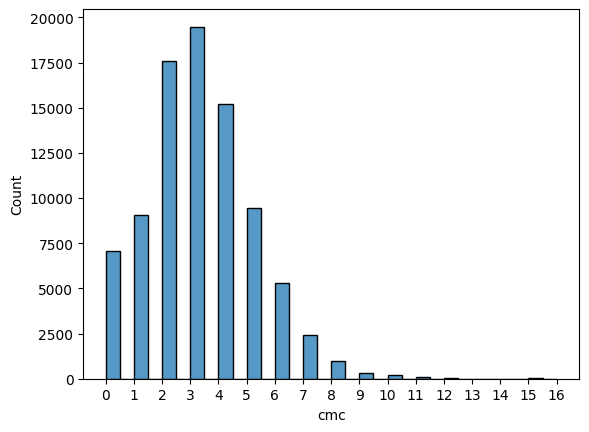

In [29]:
sns.histplot(df["cmc"],binwidth=0.5)
plt.xticks(range(0, 17))
plt.show();

In [30]:
#Vale, mana cost tiene nulos y está rleacionada con CMC, asi que vamos a quedarnos con cmc y mana_cost vamos a dropearla
df.drop(columns="mana_cost", axis=1, inplace=True)
#df

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\4025120113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="mana_cost", axis=1, inplace=True)


In [31]:
## Voy a trabajar más adelante el mana cost con los colores

## Type Line, esta es jodida

In [32]:
#Tenemos un problema, y es que es un caos esta columna y pueden salir muchos valores, asi que vamos a simplemente
#separarla en tipos principales y luego hacer un one hot encoding con eso. Ya veremos luego qué hacemos

df["type_line"].isnull().sum()

0

In [33]:
# Aplicar la función al DataFrame
df[['type_main', 'type_sub']] = df['type_line'].apply(lambda x: pd.Series(func.split_type_line(x)))

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2109969772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['type_main', 'type_sub']] = df['type_line'].apply(lambda x: pd.Series(func.split_type_line(x)))
C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2109969772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['type_main', 'type_sub']] = df['type_line'].apply(lambda x: pd.Series(func.split_type_line(x)))


In [34]:
df = df[~df["type_main"].str.contains("Hero", na=False)]

In [35]:
df

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,textless,full_art,booster,power,toughness,edhrec_rank,prices,released_year,type_main,type_sub
1,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006,Creature,Sliver
2,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009,Creature,"Kor,Soldier"
4,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017,Creature,"Siren,Pirate"
5,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994,Enchantment,Aura
6,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,False,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025,Land,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96734,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024,Sorcery,
96735,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003,Creature,Troll
96736,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023,Creature,"Faerie,Rogue"
96737,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018,Creature,"Vampire,Soldier"


In [36]:
#Ahora vamos a intentar analizar los tipos y tal

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir por coma y aplanar la lista
all_main_types = df['type_main'].dropna().str.split(',').sum()

# Contar la frecuencia de cada tipo
type_counts = Counter(all_main_types)


In [37]:
type_counts

Counter({'Creature': 43722,
         'Legendary': 11626,
         'Artifact': 10443,
         'Instant': 10068,
         'Sorcery': 9924,
         'Enchantment': 9534,
         'Land': 6567,
         'Planeswalker': 1374,
         'Snow': 210,
         'Kindred': 151,
         'Battle': 55,
         'World': 47,
         'Dungeon': 3,
         'Elemental': 2,
         'Poly': 1,
         'instant': 1,
         'Universewalker': 1,
         'Scariest': 1,
         "You'll": 1,
         'Ever': 1,
         'See': 1})

In [38]:
def contains_invalid_type(types_str):
    invalid_types = {k for k, v in type_counts.items() if v <= 4}
    if pd.isna(types_str):
        return False
    types = types_str.split(',')
    return any(t in invalid_types for t in types)

# Paso 3: Filtrar el DataFrame eliminando las filas con al menos un tipo inválido
df = df[~df['type_main'].apply(contains_invalid_type)].reset_index(drop=True)

In [39]:
# Dividir por coma y aplanar la lista
all_main_types = df['type_main'].dropna().str.split(',').sum()

# Contar la frecuencia de cada tipo
type_counts = Counter(all_main_types)

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\597795642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Type', data=type_df, palette='mako')


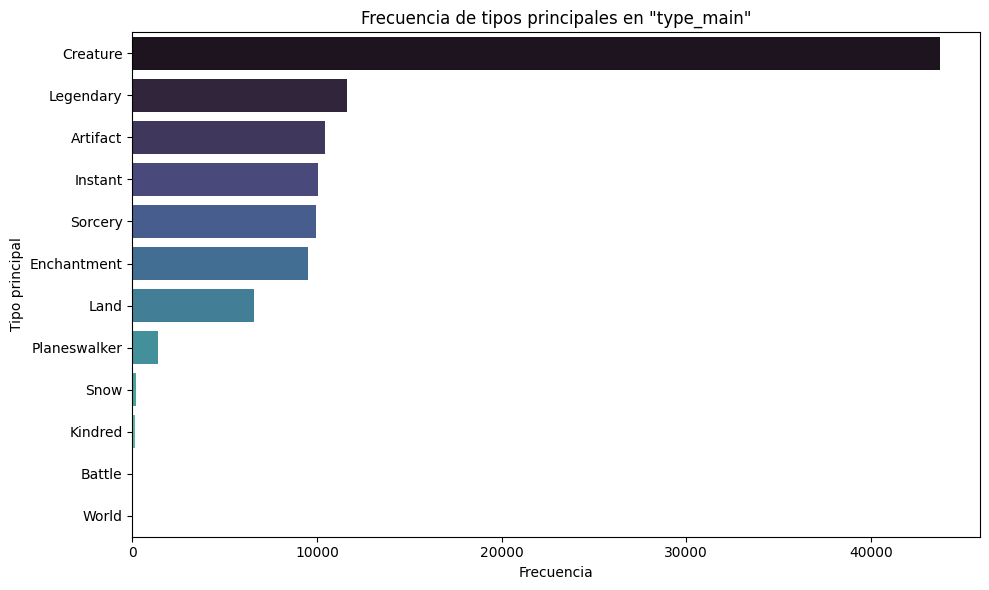

In [40]:
# Convertir a DataFrame para graficar
type_df = pd.DataFrame(type_counts.items(), columns=['Type', 'Count']).sort_values(by='Count', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Type', data=type_df, palette='mako')
plt.title('Frecuencia de tipos principales en "type_main"')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo principal')
plt.tight_layout()
plt.show()

In [41]:
type_counts

Counter({'Creature': 43721,
         'Legendary': 11625,
         'Artifact': 10442,
         'Instant': 10066,
         'Sorcery': 9924,
         'Enchantment': 9534,
         'Land': 6567,
         'Planeswalker': 1374,
         'Snow': 210,
         'Kindred': 151,
         'Battle': 55,
         'World': 47})

In [42]:
# Crear one-hot encoding multietiqueta para 'type_main'
type_main_dummies = df['type_main'].str.get_dummies(sep=',')

# Unir al DataFrame original (opcional)
df = pd.concat([df, type_main_dummies], axis=1)


df

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
0,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
1,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
2,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
3,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,1,0,0,0,0,0,0,0,0
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,0,0,0,0,0,0,0,1,0
87156,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
87157,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
87158,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0


In [43]:
## Type cartas
df["type_sub"].nunique()

2695

In [44]:
df_frecuencias = func.contar_subtipos(df['type_sub'])
print(df_frecuencias.head(10))

     subtipo  frecuencia
0      Human        9687
1       Aura        3171
2     Wizard        2999
3    Warrior        2706
4    Soldier        2163
5        Elf        2023
6     Zombie        1656
7     Spirit        1647
8  Elemental        1645
9     Cleric        1491


In [45]:
df_frecuencias.count()

subtipo       474
frecuencia    474
dtype: int64

In [46]:
df_frecuencias

,subtipo,frecuencia
0,Human,9687
1,Aura,3171
2,Wizard,2999
3,Warrior,2706
4,Soldier,2163
...,...,...
469,Zonian,1
470,Spawn,1
471,Ersta,1
472,Vampyre,1


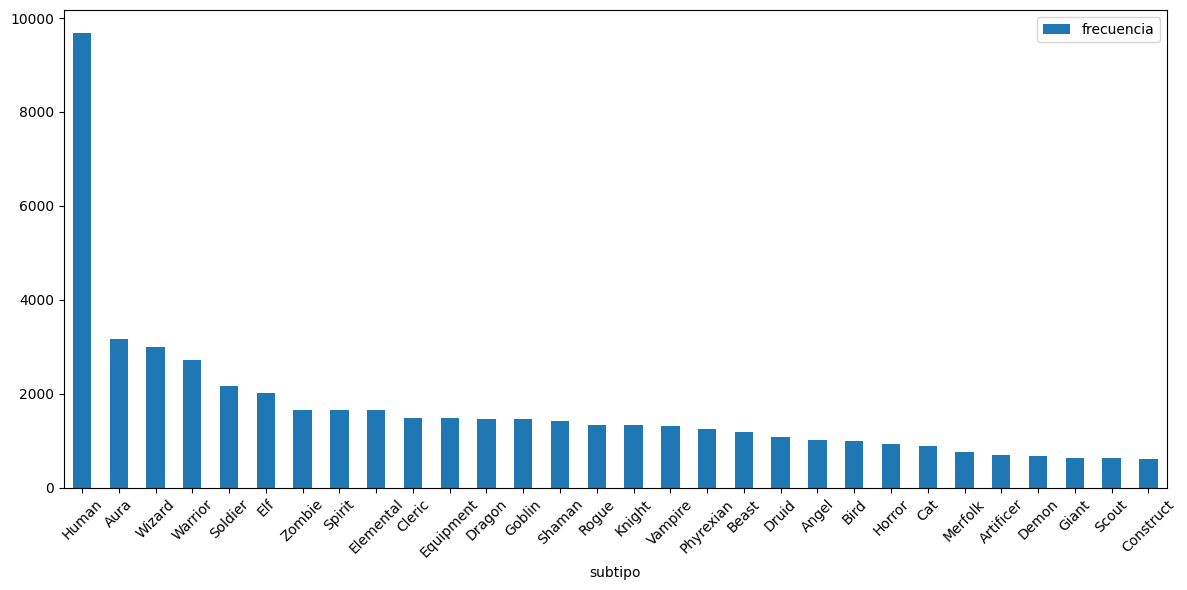

In [47]:
df_frecuencias.head(30).plot.bar(x='subtipo', y='frecuencia', figsize=(12,6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# # 1. Convertir la columna a texto limpio (por si hay NaNs)
# df['type_sub_clean'] = df['type_sub'].fillna('')

# # 2. Vectorizar usando TF-IDF (trata las etiquetas como "palabras")
# vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
# X_tfidf = vectorizer.fit_transform(df['type_sub_clean'])

# # 3. Reducir dimensión con SVD (similar a PCA)
# svd = TruncatedSVD(n_components=10, random_state=42)
# X_tfidf_reduced = svd.fit_transform(X_tfidf)

# # 4. Convertir a dataframe y unir al principal
# df_tfidf = pd.DataFrame(X_tfidf_reduced, columns=[f'type_sub_tfidf_{i}' for i in range(1, 11)], index=df.index)
# df = pd.concat([df, df_tfidf], axis=1)

In [49]:
# De momento no las quito para tener información mientras hago la limpieza y mierdas
# oye al final las quito y ya
df.drop(columns=["type_line", "type_main", "type_sub"], inplace=True)

## Vamos a colores, paso ahora del oracle text

In [50]:
df[df["colors"] == "[]"]

,name,cmc,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,game_changer,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,0,0,0,1,0,0,0,0,0
27,Orzhov Guildgate,0.0,This land enters tapped.\n{T}: Add {W} or {B}.,[],"['B', 'W']",[],"['B', 'W']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,0,0,0,1,0,0,0,0,0
40,Crown of Gondor,3.0,Equipped creature gets +1/+1 for each creature...,[],[],['Equip'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,1,0,0,0,0
45,Mox Jet,0.0,{T}: Add {B}.,[],['B'],[],['B'],"{'standard': 'not_legal', 'future': 'not_legal...",True,False,...,0,0,0,0,0,0,0,0,0,0
53,Triskelion,6.0,This creature enters with three +1/+1 counters...,[],[],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87120,Obelisk of Jund,3.0,"{T}: Add {B}, {R}, or {G}.",[],"['B', 'G', 'R']",[],"['B', 'G', 'R']","{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,0
87141,Unknown Shores,0.0,"{T}: Add {C}.\n{1}, {T}: Add one mana of any c...",[],[],[],"['B', 'C', 'G', 'R', 'U', 'W']","{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,1,0,0,0,0,0
87145,Sol Ring,1.0,{T}: Add {C}{C}.,[],[],[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,0
87146,Evolving Wilds,0.0,"{T}, Sacrifice this land: Search your library ...",[],[],[],NaN,"{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,0,0,0,1,0,0,0,0,0


In [51]:
df["colors"].isnull().sum()

1072

In [52]:
df[df["colors"].isnull()]

,name,cmc,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,game_changer,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
64,Invasion of Tolvada // The Broken Sky,5.0,"(As a Siege enters, choose an opponent to prot...",NaN,"['B', 'W']",['Transform'],NaN,"{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,1,0,0,0,0,0,0,0,0
106,"Growing Rites of Itlimoc // Itlimoc, Cradle of...",3.0,"When Growing Rites of Itlimoc enters, look at ...",NaN,['G'],['Transform'],['G'],"{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,1,0,0,1,1,0,0,0,0
204,"Nissa, Vastwood Seer // Nissa, Sage Animist",3.0,"When Nissa enters, you may search your library...",NaN,['G'],['Transform'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,1,1,0,0,0
229,Biolume Egg // Biolume Serpent,3.0,"Defender\nWhen this creature enters, scry 2.\n...",NaN,['U'],"['Transform', 'Defender', 'Scry']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
459,Skyclave Cleric // Skyclave Basilica,2.0,"When this creature enters, you gain 2 life.\n/...",NaN,['W'],[],['W'],"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86809,"Nissa, Vastwood Seer // Nissa, Sage Animist",3.0,"When Nissa enters, you may search your library...",NaN,['G'],['Transform'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,1,1,0,0,0
86902,Distracting Geist // Clever Distraction,3.0,"Whenever this creature attacks, tap target cre...",NaN,['W'],"['Transform', 'Enchant', 'Disturb']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,1,0,0,0,0,0,0,0,0
86954,"Dorothea, Vengeful Victim // Dorothea's Retrib...",2.0,"Flying\nWhen Dorothea attacks or blocks, sacri...",NaN,"['U', 'W']","['Flying', 'Transform', 'Enchant', 'Disturb']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,1,0,0,0,1,0,0,0,0
87038,Desperate Farmer // Depraved Harvester,3.0,Lifelink\nWhen another creature you control di...,NaN,['B'],"['Lifelink', 'Transform']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df["color_identity"].isnull().sum()

0

In [54]:
#Voy a directamente dropear la de Colors y me voy a quedar con Color identity.
df.drop(columns="colors", axis=1, inplace= True)
#Ahora toca trabajarla

In [55]:
# import ast

# # Convertir string a lista real si es necesario, luego unir por comas
# df['color_identity_clean'] = df['color_identity'].apply(
#     lambda x: ','.join(ast.literal_eval(x)) if isinstance(x, str) else ','.join(x)
# )

df

,name,cmc,oracle_text,color_identity,keywords,produced_mana,legalities,reserved,game_changer,foil,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
0,Fury Sliver,6.0,All Sliver creatures have double strike.,['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,1,0,0,0,0,0,0,0,0,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,1,0,0,0,0,0,0,0,0,0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,1,0,0,0,0,0,0,0,0,0
3,Web,1.0,Enchant creature (Target a creature as you cas...,['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,True,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,"['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,0,0,1,0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,1,0,0,0,0,0,0,0,0,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,1,0,0,0,0,0,0,0,0,0
87158,Exultant Skymarcher,3.0,Flying,['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,1,0,0,0,0,0,0,0,0,0


In [56]:
import ast

df['color_identity_clean'] = df['color_identity'].apply(func.clean_color_identity)

In [57]:
df

,name,cmc,oracle_text,color_identity,keywords,produced_mana,legalities,reserved,game_changer,foil,...,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World,color_identity_clean
0,Fury Sliver,6.0,All Sliver creatures have double strike.,['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,R
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,W
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,U
3,Web,1.0,Enchant creature (Target a creature as you cas...,['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,1,0,0,0,0,0,0,0,0,G
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,True,...,0,0,0,1,0,0,0,0,0,"B,G"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,"['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,0,1,0,"G,U"
87156,Horned Troll,3.0,{G}: Regenerate this creature.,['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,0,0,0,G
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,0,0,0,B
87158,Exultant Skymarcher,3.0,Flying,['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,W


In [58]:
color_dummies = df['color_identity_clean'].str.get_dummies(sep=',')

if '.i' in color_dummies.columns:
    color_dummies.drop(columns=['.i'], inplace=True)

df = pd.concat([df, color_dummies], axis=1)

df.drop(columns=['color_identity', 'color_identity_clean'], inplace=True)

df

,name,cmc,oracle_text,keywords,produced_mana,legalities,reserved,game_changer,foil,nonfoil,...,Legendary,Planeswalker,Snow,Sorcery,World,B,G,R,U,W
0,Fury Sliver,6.0,All Sliver creatures have double strike.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,0,0,0,0,0,0,1,0,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,0,0,0,0,0,0,0,0,1
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...","['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
3,Web,1.0,Enchant creature (Target a creature as you cas...,['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,0,0,0,0,1,0,0,0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,True,True,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,0,1,0,0,1,0,1,0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,0,0,0,0,1,0,0,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,0,0,0,1,0,0,0,0
87158,Exultant Skymarcher,3.0,Flying,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,0,0,0,0,0,0,0,0,1


In [59]:
color_columns = ['W', 'U', 'B', 'R', 'G'] 

color_percentages = df[color_columns].mean().sort_values(ascending=False) * 100

print(color_percentages)

num_colorless = (df[color_columns].sum(axis=1) == 0).sum()

percent_colorless = num_colorless / len(df) * 100

print(f"Cartas incoloras: {num_colorless} ({percent_colorless:.2f}%)")


G    22.693896
B    22.611290
W    22.491969
U    22.339376
R    22.331345
dtype: float64
Cartas incoloras: 9644 (11.06%)


In [60]:
# Se me va a ir la cabeza. Voy a hacer que las columnas de colores no sean 1/0, sino que contengan el... no nada
#porque si lo hago así, las incoloras o las que no tienen coste será raro.
#Ya veré qué hago

## Vamos a ir a hacer Legalities

In [61]:
# Aplicar todo al dataframe
df['legalities_dict'] = df['legalities'].apply(func.parse_legalities)

# Crear columnas individuales
for fmt in func.target_formats:
    df[f'legal_{fmt}'] = df['legalities_dict'].apply(lambda d: func.map_legal_status(d.get(fmt)))

In [62]:
df

,name,cmc,oracle_text,keywords,produced_mana,legalities,reserved,game_changer,foil,nonfoil,...,U,W,legalities_dict,legal_standard,legal_pioneer,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper
0,Fury Sliver,6.0,All Sliver creatures have double strike.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,1,1,1,1,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,1,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,1,1,1,1,1
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...","['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,1,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,1,1,1,1,1,1
3,Web,1.0,Enchant creature (Target a creature as you cas...,['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,1,1,1,1,0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,True,True,...,0,0,"{'standard': 'legal', 'future': 'legal', 'hist...",1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,1,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,1,1,1,0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,1,1,1,1,1
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,True,...,0,0,"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,1,1,1,0
87158,Exultant Skymarcher,3.0,Flying,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,True,...,0,1,"{'standard': 'not_legal', 'future': 'not_legal...",0,1,1,1,1,1,1


In [63]:
# df["legal_vintage"].fillna(-2, inplace=True)

In [64]:
df.drop(columns=["legalities", "legalities_dict"], axis=1, inplace=True)

## Keywords

In [65]:
## Creo que la solución va a ser identificar cuáles son de evasión y pasar a poner si tienen evasión o no. O directamente
## contar cuantas keywords tiene que igual eso sí que tiene más peso.

In [66]:

df['keyword_count'] = df['keywords'].fillna('[]').apply(lambda x: len(ast.literal_eval(x)))

df

,name,cmc,oracle_text,keywords,produced_mana,reserved,game_changer,foil,nonfoil,promo,...,U,W,legal_standard,legal_pioneer,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count
0,Fury Sliver,6.0,All Sliver creatures have double strike.,[],NaN,False,False,True,True,False,...,0,0,0,0,1,1,1,1,0,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",[],NaN,False,False,True,True,False,...,0,1,0,0,1,1,1,1,1,0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...","['Flying', 'Explore']",NaN,False,False,True,True,False,...,1,0,0,1,1,1,1,1,1,2
3,Web,1.0,Enchant creature (Target a creature as you cas...,['Enchant'],NaN,False,False,False,True,False,...,0,0,0,0,1,1,1,1,0,1
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",False,False,True,True,True,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,['Fight'],NaN,False,False,False,True,False,...,1,0,0,0,0,1,1,1,0,1
87156,Horned Troll,3.0,{G}: Regenerate this creature.,[],NaN,False,False,False,True,False,...,0,0,0,0,1,1,1,1,1,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['Flying'],NaN,False,False,False,True,False,...,0,0,0,0,0,1,1,1,0,1
87158,Exultant Skymarcher,3.0,Flying,['Flying'],NaN,False,False,True,True,False,...,0,1,0,1,1,1,1,1,1,1


In [67]:
# Aplicar la función al DataFrame
df['has_evasion'] = df['keywords'].fillna('[]').apply(func.tiene_evasion)

# Aplicar al DataFrame
df['has_evasion'] = df.apply(func.detectar_evasion, axis=1)
df

,name,cmc,oracle_text,keywords,produced_mana,reserved,game_changer,foil,nonfoil,promo,...,W,legal_standard,legal_pioneer,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion
0,Fury Sliver,6.0,All Sliver creatures have double strike.,[],NaN,False,False,True,True,False,...,0,0,0,1,1,1,1,0,0,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",[],NaN,False,False,True,True,False,...,1,0,0,1,1,1,1,1,0,0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...","['Flying', 'Explore']",NaN,False,False,True,True,False,...,0,0,1,1,1,1,1,1,2,1
3,Web,1.0,Enchant creature (Target a creature as you cas...,['Enchant'],NaN,False,False,False,True,False,...,0,0,0,1,1,1,1,0,1,0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",False,False,True,True,True,...,0,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,['Fight'],NaN,False,False,False,True,False,...,0,0,0,0,1,1,1,0,1,0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,[],NaN,False,False,False,True,False,...,0,0,0,1,1,1,1,1,0,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,['Flying'],NaN,False,False,False,True,False,...,0,0,0,0,1,1,1,0,1,1
87158,Exultant Skymarcher,3.0,Flying,['Flying'],NaN,False,False,True,True,False,...,1,0,1,1,1,1,1,1,1,1


In [68]:
df.drop(columns=["keywords"], axis= 1, inplace=True)

## Produced Mana

In [69]:
df.produced_mana.unique()

array([nan, "['B', 'G']", "['B', 'G', 'R', 'U', 'W']", "['G']",
       "['B', 'W']", "['B']", "['U']", "['G', 'U']", "['C']",
       "['C', 'G', 'U']", "['B', 'U', 'W']", "['C', 'U', 'W']", "['R']",
       "['G', 'W']", "['R', 'W']", "['U', 'W']", "['G', 'R']",
       "['B', 'R']", "['R', 'U']", "['G', 'R', 'W']", "['B', 'C', 'R']",
       "['B', 'U']", "['C', 'G', 'R']", "['W']", "['B', 'G', 'U']",
       "['R', 'U', 'W']", "['G', 'U', 'W']",
       "['B', 'C', 'G', 'R', 'U', 'W']", "['C', 'R', 'W']",
       "['B', 'G', 'R']", "['B', 'C']", "['C', 'U']", "['B', 'R', 'U']",
       "['C', 'R', 'U']", "['G', 'R', 'U']", "['B', 'C', 'U']",
       "['B', 'C', 'G']", "['C', 'G', 'W']", "['B', 'R', 'W']",
       "['C', 'G']", "['B', 'C', 'W']", "['B', 'G', 'W']",
       "['G', 'R', 'U', 'W']", "['B', 'C', 'R', 'U']", "['C', 'W']",
       "['T']", "['C', 'G', 'U', 'W']", "['C', 'R']",
       "['B', 'C', 'G', 'R']", "['C', 'G', 'R', 'W']",
       "['B', 'C', 'U', 'W']", "['B', 'C', 'R', 'W']",

In [70]:

df['mana_produced_count'] = df['produced_mana'].apply(func.contar_manas)

In [71]:
df.drop(columns="produced_mana", inplace=True, axis= 1)

In [72]:
df

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,rarity,...,legal_standard,legal_pioneer,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,uncommon,...,0,0,1,1,1,1,0,0,0,0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,common,...,0,0,1,1,1,1,1,0,0,0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,common,...,0,1,1,1,1,1,1,2,1,0
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,rare,...,0,0,1,1,1,1,0,1,0,0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,rare,...,1,1,1,1,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,rare,...,0,0,0,1,1,1,0,1,0,0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,common,...,0,0,1,1,1,1,1,0,0,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,rare,...,0,0,0,1,1,1,0,1,1,0
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,common,...,0,1,1,1,1,1,1,1,1,0


## Power y Thpughnes

In [73]:
df.power.unique()

array(['3', '2', '1', nan, '0', '4', '6', '5', '7', '8', '*', '9', '10',
       '12', '11', '+2', '18', '2.5', '13', '15', '1+*', '-1', '?', '3.5',
       '1.5', '∞', '2+*', '16', '+1', '.5', '+4', '+0', '+3', '*²'],
      dtype=object)

In [74]:
df.toughness.unique()

array(['3', '2', nan, '4', '1', '5', '6', '7', '0', '8', '*', '9', '10',
       '1+*', '12', '11', '+3', '7-*', '17', '13', '15', '?', '-1', '*+1',
       '2.5', '3.5', '2+*', '+2', '16', '14', '1.5', '+4', '20', '.5',
       '-0', '+1', '*²', '+0'], dtype=object)

In [75]:

# Aplicar al DataFrame
df['power_num'] = func.procesar_columna(df['power'])
df['toughness_num'] = func.procesar_columna(df['toughness'])

df

e:\AreaTrabajo\REPO_PRUEBA\ML_Magic_The_Gathering\src\notebooks\..\utils\funciones.py:240: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  parsed = parsed.replace("moda", moda_val)
e:\AreaTrabajo\REPO_PRUEBA\ML_Magic_The_Gathering\src\notebooks\..\utils\funciones.py:240: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  parsed = parsed.replace("moda", moda_val)


,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,rarity,...,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,uncommon,...,1,1,1,1,0,0,0,0,3.0,3.0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,common,...,1,1,1,1,1,0,0,0,2.0,2.0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,common,...,1,1,1,1,1,2,1,0,1.0,2.0
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,rare,...,1,1,1,1,0,1,0,0,-2.0,-2.0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,rare,...,1,1,1,1,0,0,0,2,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,rare,...,0,1,1,1,0,1,0,0,-2.0,-2.0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,common,...,1,1,1,1,1,0,0,0,2.0,2.0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,rare,...,0,1,1,1,0,1,1,0,2.0,2.0
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,common,...,1,1,1,1,1,1,1,0,2.0,3.0


In [76]:
df.drop(columns=["power","toughness"], inplace=True, axis=1)

## Rarity

In [77]:
df["rarity"].unique()

array(['uncommon', 'common', 'rare', 'mythic', 'special'], dtype=object)

In [78]:
df

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,rarity,...,legal_modern,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,uncommon,...,1,1,1,1,0,0,0,0,3.0,3.0
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,common,...,1,1,1,1,1,0,0,0,2.0,2.0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,common,...,1,1,1,1,1,2,1,0,1.0,2.0
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,rare,...,1,1,1,1,0,1,0,0,-2.0,-2.0
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,rare,...,1,1,1,1,0,0,0,2,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,rare,...,0,1,1,1,0,1,0,0,-2.0,-2.0
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,common,...,1,1,1,1,1,0,0,0,2.0,2.0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,rare,...,0,1,1,1,0,1,1,0,2.0,2.0
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,common,...,1,1,1,1,1,1,1,0,2.0,3.0


In [79]:
raritydict = {
    "common" : 0,
    "uncommon" : 1,
    "rare" : 2,
    "mythic" : 3,
    "special" : 4,
    "bonus": 5
}

df["rarity_labeled"] = df["rarity"].map(raritydict)

df

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,rarity,...,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,uncommon,...,1,1,1,0,0,0,0,3.0,3.0,1
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,common,...,1,1,1,1,0,0,0,2.0,2.0,0
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,common,...,1,1,1,1,2,1,0,1.0,2.0,0
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,rare,...,1,1,1,0,1,0,0,-2.0,-2.0,2
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,rare,...,1,1,1,0,0,0,2,-2.0,-2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,rare,...,1,1,1,0,1,0,0,-2.0,-2.0,2
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,common,...,1,1,1,1,0,0,0,2.0,2.0,0
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,rare,...,1,1,1,0,1,1,0,2.0,2.0,2
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,common,...,1,1,1,1,1,1,0,2.0,3.0,0


In [80]:
#Luego dropeamos la columna
df.drop(columns="rarity", axis=1, inplace=True)

## Analizamos y ya en otra trabajamos Oracle_Text

In [81]:
df["oracle_text"].isnull().sum()

1015

In [82]:
df[df["oracle_text"].isnull()]

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_legacy,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled
62,Coral Eel,2.0,NaN,False,False,False,True,False,True,False,...,1,1,1,1,0,0,0,2.0,1.0,0
115,Jasmine Boreal,5.0,NaN,False,False,True,True,False,True,False,...,1,1,1,0,0,0,0,4.0,5.0,4
119,Fire Elemental,5.0,NaN,False,False,False,True,False,True,False,...,1,1,1,1,0,0,0,5.0,4.0,1
130,Spined Wurm,5.0,NaN,False,False,False,True,False,False,False,...,1,1,1,1,0,0,0,5.0,4.0,0
275,Loxodon Convert,4.0,NaN,False,False,True,True,False,False,False,...,1,1,1,1,0,0,0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86639,Trained Armodon,3.0,NaN,False,False,False,True,False,True,False,...,1,1,1,1,0,0,0,3.0,3.0,0
86659,Prakhata Club Security,4.0,NaN,False,False,False,True,False,True,False,...,1,1,1,1,0,0,0,3.0,4.0,0
86927,Norwood Ranger,1.0,NaN,False,False,False,True,False,True,False,...,1,1,1,1,0,0,0,1.0,2.0,0
86993,Independent Troops,2.0,NaN,False,False,False,True,False,False,False,...,1,1,1,1,0,0,0,2.0,1.0,0


In [83]:
#Son todo lo que se conocen como cartas "vanilla". SImplemente les ponemos el oracle_text a un string vecío y ya.
df["oracle_text"].fillna(" ", inplace=True)
##Compruebo con las celdas de arriba si hay nulos o no ya

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\191369385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oracle_text"].fillna(" ", inplace=True)


In [84]:
df["oracle_text"].isnull().sum()

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87160 entries, 0 to 87159
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 87160 non-null  object 
 1   cmc                  87160 non-null  float64
 2   oracle_text          87160 non-null  object 
 3   reserved             87160 non-null  bool   
 4   game_changer         87160 non-null  bool   
 5   foil                 87160 non-null  bool   
 6   nonfoil              87160 non-null  bool   
 7   promo                87160 non-null  bool   
 8   reprint              87160 non-null  bool   
 9   textless             87160 non-null  bool   
 10  full_art             87160 non-null  bool   
 11  booster              87160 non-null  bool   
 12  edhrec_rank          85343 non-null  float64
 13  prices               87160 non-null  object 
 14  released_year        87160 non-null  int32  
 15  Artifact             87160 non-null 

## edhrec_rank imputar nulos

In [86]:
df['edhrec_rank'].fillna(df['edhrec_rank'].max(), inplace=True)

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\3400125385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edhrec_rank'].fillna(df['edhrec_rank'].max(), inplace=True)


In [87]:
df["edhrec_rank"].isnull().sum()

0

In [88]:
df['edhrec_rank'] = df['edhrec_rank'].max() - df['edhrec_rank']

## Venga, vamos con el target (Prices)

In [89]:
df["prices"].isnull().sum()

0

In [90]:
# Aplicar al DataFrame
df['prices_dict'] = df['prices'].apply(func.parse_prices)
df['final_price_eur'] = df['prices_dict'].apply(func.get_final_price)

In [91]:
df

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled,prices_dict,final_price_eur
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,False,...,1,0,0,0,0,3.0,3.0,1,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",0.21
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,False,...,1,1,0,0,0,2.0,2.0,0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",0.18
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,False,...,1,1,2,1,0,1.0,2.0,0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",0.09
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,False,...,1,0,1,0,0,-2.0,-2.0,2,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1.03
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,False,...,1,0,0,0,2,-2.0,-2.0,2,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,False,...,1,0,1,0,0,-2.0,-2.0,2,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",0.41
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,False,...,1,1,0,0,0,2.0,2.0,0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",0.18
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,False,...,1,0,1,1,0,2.0,2.0,2,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",0.50
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,False,...,1,1,1,1,0,2.0,3.0,0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",0.09


In [92]:
df["final_price_eur"].isnull().sum()

2025

In [93]:
df[df["final_price_eur"].isnull()]

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled,prices_dict,final_price_eur
45,Mox Jet,0.0,{T}: Add {B}.,True,False,False,True,False,True,False,...,-2,0,0,0,1,-2.0,-2.0,2,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
49,The Convincing General,5.0,Changeling (This card is every creature type.)...,False,False,False,True,False,False,False,...,0,0,1,0,0,5.0,5.0,3,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
51,Vaevictis Asmadi,8.0,"Flying\nAt the beginning of your upkeep, sacri...",False,False,False,True,False,True,False,...,1,0,1,1,0,7.0,7.0,2,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
58,Rogue Kavu,2.0,"Whenever this creature attacks alone, it gets ...",False,False,True,False,False,True,False,...,1,1,0,0,0,1.0,1.0,0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
65,The Great Juggernaut,4.0,"At the beginning of your upkeep, sacrifice The...",False,False,False,True,False,False,False,...,0,0,0,0,0,5.0,3.0,2,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87036,Purelace,1.0,Target spell or permanent becomes white. (Mana...,False,False,False,True,False,True,False,...,1,0,0,0,0,-2.0,-2.0,2,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
87040,Birchlore Rangers,1.0,Tap two untapped Elves you control: Add one ma...,False,False,False,True,False,True,False,...,1,1,1,0,5,1.0,1.0,0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
87058,Sphinx of Jwar Isle,6.0,Flying\nShroud (This creature can't be the tar...,False,False,False,True,False,True,False,...,1,0,2,1,0,5.0,5.0,2,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN
87082,Terramorphic Expanse,0.0,"{T}, Sacrifice this land: Search your library ...",False,False,False,True,False,True,False,...,1,1,0,0,0,-2.0,-2.0,0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN


In [94]:
df.drop(columns=["prices", "prices_dict"], axis=1, inplace=True)

In [95]:
## Vale, ahora tenemos varios nulos, pero creo que son cartas que ya tienen duplicados, asi que igual nos las podemos garchar.
# Paso 1: Filtrar las cartas sin precio
sin_precio = df[df['final_price_eur'].isna()]

# Paso 2: Ver qué nombres tienen al menos una copia con precio
nombres_con_precio = set(df[~df['final_price_eur'].isna()]['name'])

# Paso 3: Separar las que tienen coincidencia y las que no
# Si el nombre está en nombres_con_precio, dropéala
# Si no, guárdala en prueba_predict
prueba_predict = sin_precio[~sin_precio['name'].isin(nombres_con_precio)]

# Paso 4: Eliminar del df principal las que no hacen falta
df = df[~((df['final_price_eur'].isna()) & (df['name'].isin(nombres_con_precio)))]

In [96]:
prueba_predict

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled,final_price_eur
49,The Convincing General,5.0,Changeling (This card is every creature type.)...,False,False,False,True,False,False,False,...,0,0,0,1,0,0,5.0,5.0,3,NaN
65,The Great Juggernaut,4.0,"At the beginning of your upkeep, sacrifice The...",False,False,False,True,False,False,False,...,0,0,0,0,0,0,5.0,3.0,2,NaN
264,"Htbr, Racetrack Referee",2.0,Players can't cast spells by paying alternativ...,False,False,False,True,False,False,False,...,0,0,0,0,0,0,2.0,2.0,2,NaN
452,Team Acceleration,2.0,Team Cloudspire — Create two 1/1 white Warrior...,False,False,False,True,False,False,False,...,0,0,0,0,0,0,-2.0,-2.0,1,NaN
729,The Mystery Raceway,0.0,Start your engines!\n{T}: Add {C}.\nMax Speed ...,False,False,False,True,False,False,False,...,0,0,0,3,0,1,-2.0,-2.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86425,Trampled Lotus,2.0,"{T}, Sacrifice Trampled Lotus: Tap up to three...",False,False,False,True,False,False,False,...,0,0,0,0,0,0,-2.0,-2.0,2,NaN
86651,Nim Mongoose,1.0,Shroud (This creature can't be the target of s...,False,False,False,True,False,False,False,...,0,0,0,2,0,0,2.0,1.0,1,NaN
86759,Agoraphobic Phyrexian,5.0,Flying\nWhen Agoraphobic Phyrexian enters the ...,False,False,False,True,False,False,False,...,0,0,0,1,1,0,4.0,4.0,2,NaN
86851,Power Level Analyzer,3.0,As Power Level Analyzer enters the battlefield...,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0.0,0.0,1,NaN


In [97]:
df["final_price_eur"].isnull().sum()

469

In [98]:
df.dropna(subset=["final_price_eur"], inplace=True)

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2198919907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["final_price_eur"], inplace=True)


In [99]:
df

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled,final_price_eur
0,Fury Sliver,6.0,All Sliver creatures have double strike.,False,False,True,True,False,False,False,...,1,1,0,0,0,0,3.0,3.0,1,0.21
1,Kor Outfitter,2.0,"When this creature enters, you may attach targ...",False,False,True,True,False,False,False,...,1,1,1,0,0,0,2.0,2.0,0,0.18
2,Siren Lookout,3.0,"Flying\nWhen this creature enters, it explores...",False,False,True,True,False,False,False,...,1,1,1,2,1,0,1.0,2.0,0,0.09
3,Web,1.0,Enchant creature (Target a creature as you cas...,False,False,False,True,False,True,False,...,1,1,0,1,0,0,-2.0,-2.0,2,1.03
4,Wastewood Verge,0.0,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,False,False,True,True,True,True,False,...,1,1,0,0,0,2,-2.0,-2.0,2,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87155,Aggressive Biomancy,2.0,Create X tokens that are copies of target crea...,False,False,False,True,False,False,False,...,1,1,0,1,0,0,-2.0,-2.0,2,0.41
87156,Horned Troll,3.0,{G}: Regenerate this creature.,False,False,False,True,False,True,False,...,1,1,1,0,0,0,2.0,2.0,0,0.18
87157,Faerie Bladecrafter,3.0,Flying\nWhenever one or more Faeries you contr...,False,False,False,True,False,False,False,...,1,1,0,1,1,0,2.0,2.0,2,0.50
87158,Exultant Skymarcher,3.0,Flying,False,False,True,True,False,False,False,...,1,1,1,1,1,0,2.0,3.0,0,0.09


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85135 entries, 0 to 87159
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 85135 non-null  object 
 1   cmc                  85135 non-null  float64
 2   oracle_text          85135 non-null  object 
 3   reserved             85135 non-null  bool   
 4   game_changer         85135 non-null  bool   
 5   foil                 85135 non-null  bool   
 6   nonfoil              85135 non-null  bool   
 7   promo                85135 non-null  bool   
 8   reprint              85135 non-null  bool   
 9   textless             85135 non-null  bool   
 10  full_art             85135 non-null  bool   
 11  booster              85135 non-null  bool   
 12  edhrec_rank          85135 non-null  float64
 13  released_year        85135 non-null  int32  
 14  Artifact             85135 non-null  int64  
 15  Battle               85135 non-null  int6

<Axes: ylabel='final_price_eur'>

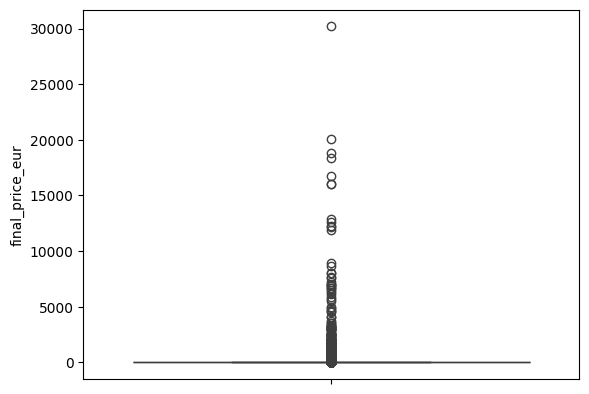

In [101]:
sns.boxplot(df["final_price_eur"])

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2908404485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["final_price_eur"])


<Axes: xlabel='final_price_eur', ylabel='Density'>

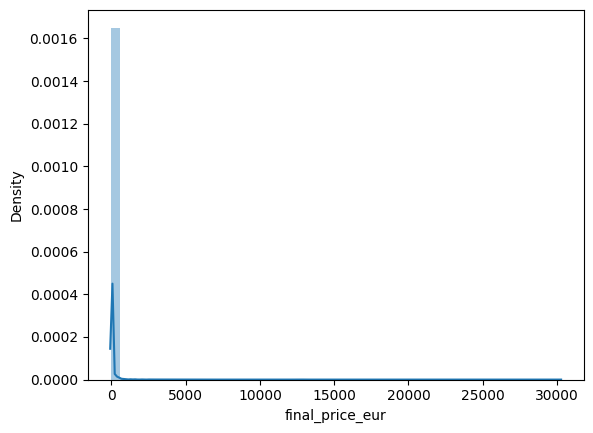

In [102]:
sns.distplot(df["final_price_eur"])

<Axes: xlabel='rarity_labeled', ylabel='final_price_eur'>

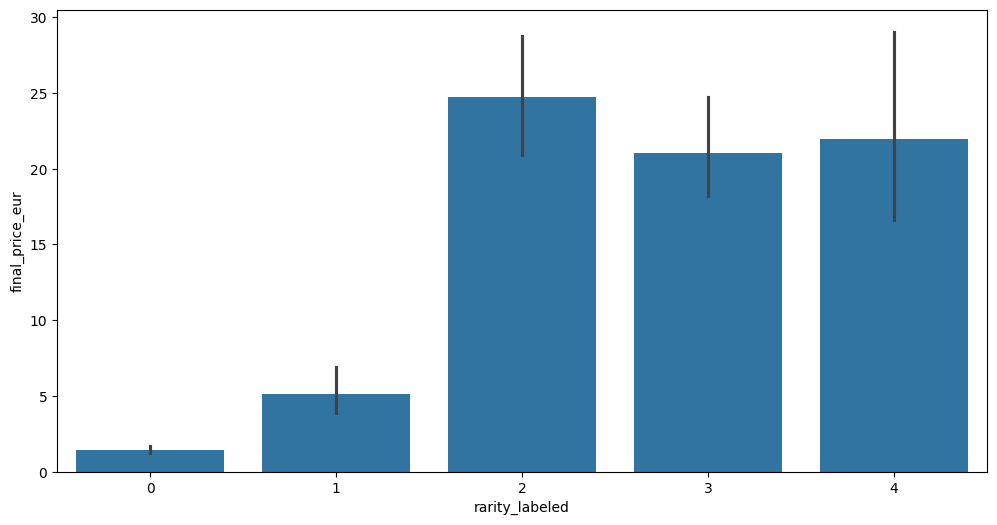

In [103]:
# df.plot.bar(x='rarity_labeled', y='final_price_eur', figsize=(12,6))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="rarity_labeled", y="final_price_eur")

In [104]:
# df.plot.bar(x='released_year', y='final_price_eur', figsize=(12,6))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(12,6))
# sns.histplot(data=df.groupby("released_year"),x="released_year",y="final_price_eur", hue="rarity_labeled")
# plt.xticks(rotation=45)
# plt.tight_layout()

<Axes: >

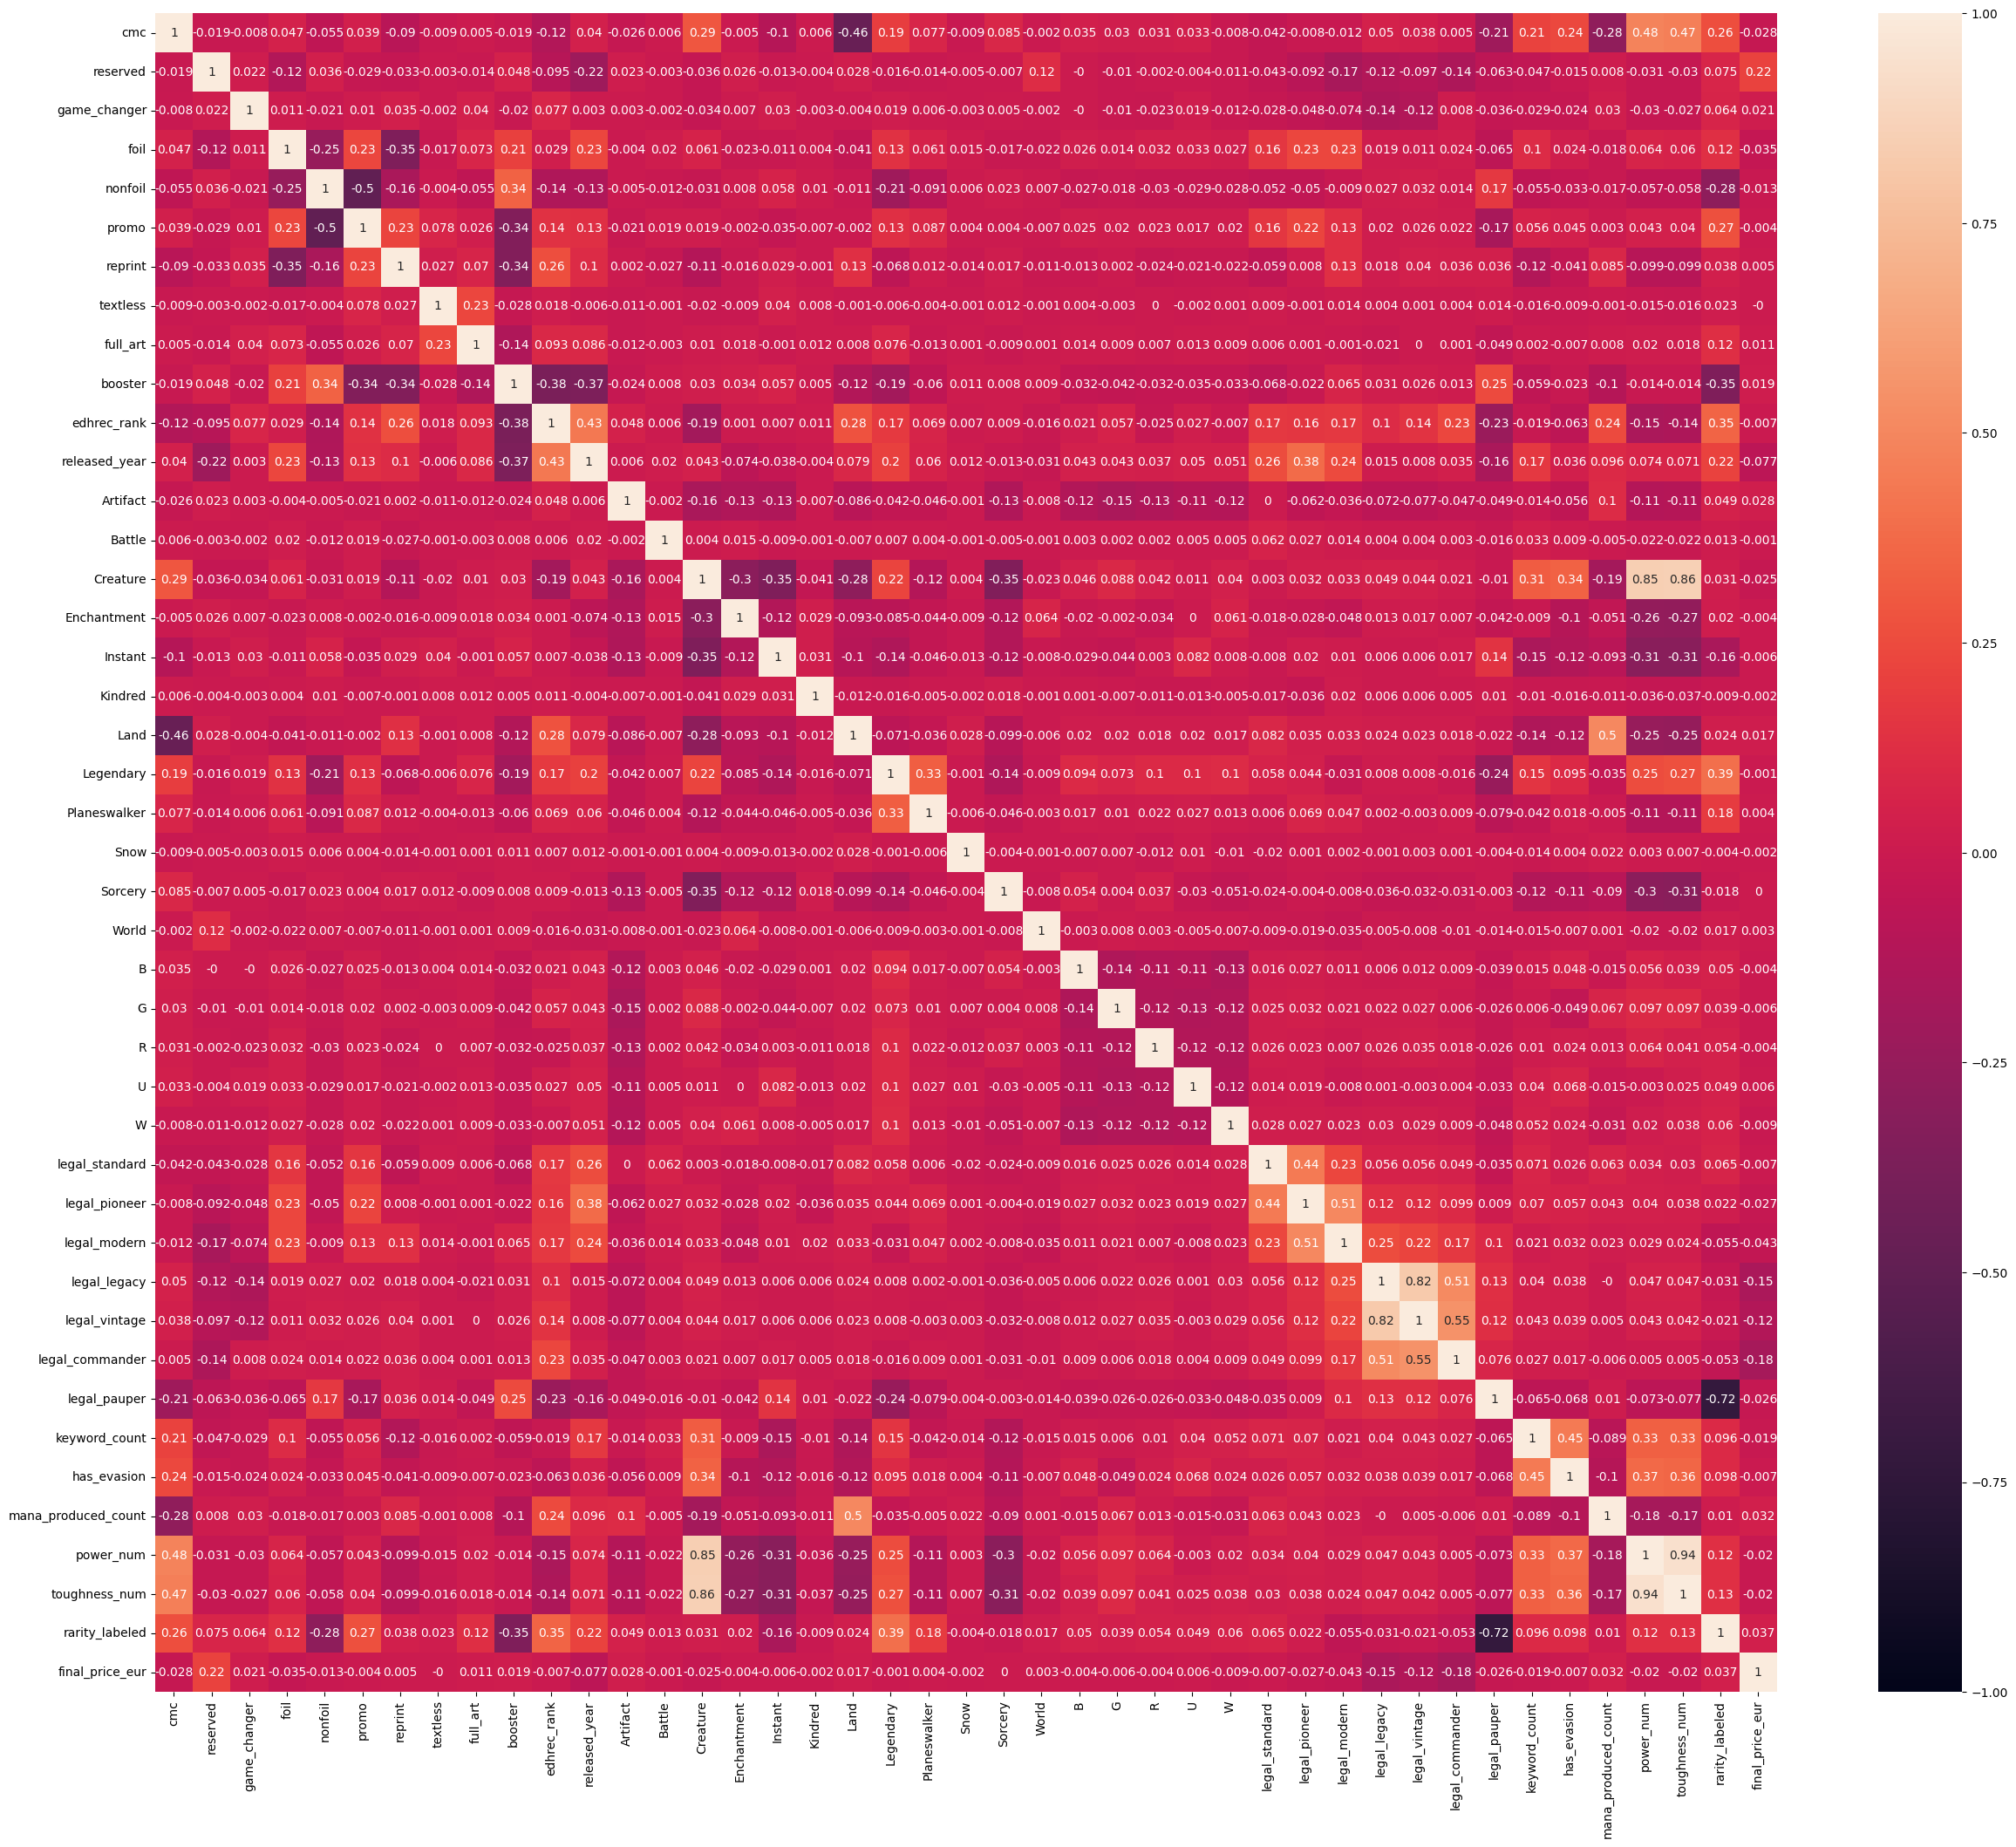

In [105]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(numeric_only=True).round(3), annot=True, vmin=-1)

In [106]:
# plt.figure(figsize=(12,6))
# sns.pairplot(df)

In [107]:
df.isnull().sum()

name                   0
cmc                    0
oracle_text            0
reserved               0
game_changer           0
foil                   0
nonfoil                0
promo                  0
reprint                0
textless               0
full_art               0
booster                0
edhrec_rank            0
released_year          0
Artifact               0
Battle                 0
Creature               0
Enchantment            0
Instant                0
Kindred                0
Land                   0
Legendary              0
Planeswalker           0
Snow                   0
Sorcery                0
World                  0
B                      0
G                      0
R                      0
U                      0
W                      0
legal_standard         0
legal_pioneer          0
legal_modern           0
legal_legacy           0
legal_vintage          0
legal_commander        0
legal_pauper           0
keyword_count          0
has_evasion            0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85135 entries, 0 to 87159
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 85135 non-null  object 
 1   cmc                  85135 non-null  float64
 2   oracle_text          85135 non-null  object 
 3   reserved             85135 non-null  bool   
 4   game_changer         85135 non-null  bool   
 5   foil                 85135 non-null  bool   
 6   nonfoil              85135 non-null  bool   
 7   promo                85135 non-null  bool   
 8   reprint              85135 non-null  bool   
 9   textless             85135 non-null  bool   
 10  full_art             85135 non-null  bool   
 11  booster              85135 non-null  bool   
 12  edhrec_rank          85135 non-null  float64
 13  released_year        85135 non-null  int32  
 14  Artifact             85135 non-null  int64  
 15  Battle               85135 non-null  int6

In [109]:
df[df.duplicated()]

,name,cmc,oracle_text,reserved,game_changer,foil,nonfoil,promo,reprint,textless,...,legal_vintage,legal_commander,legal_pauper,keyword_count,has_evasion,mana_produced_count,power_num,toughness_num,rarity_labeled,final_price_eur
6851,Knickknack Ouphe,1.0,This creature enters with X +1/+1 counters on ...,False,False,False,True,False,False,False,...,1,1,0,0,0,0,1.0,1.0,2,0.22
9947,Kraul Whipcracker,2.0,"Reach\nWhen this creature enters, destroy targ...",False,False,True,True,False,False,False,...,1,1,0,1,0,0,3.0,2.0,1,0.04
12810,"Jolrael, Mwonvuli Recluse",2.0,"Whenever you draw your second card each turn, ...",False,False,False,True,False,True,False,...,1,1,0,0,0,0,1.0,2.0,2,0.22
15019,Murder,3.0,Destroy target creature.,False,False,True,True,False,True,False,...,1,1,1,0,0,0,-2.0,-2.0,0,0.06
17843,Mulldrifter,5.0,"Flying\nWhen this creature enters, draw two ca...",False,False,False,True,False,True,False,...,1,1,1,2,1,0,2.0,2.0,1,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86055,Reliquary Tower,0.0,You have no maximum hand size.\n{T}: Add {C}.,False,False,False,True,False,True,False,...,1,1,0,0,0,1,-2.0,-2.0,1,2.20
86065,Fire Elemental,5.0,,False,False,True,True,False,True,False,...,1,1,1,0,0,0,5.0,4.0,0,0.02
86439,Fortune Teller,0.0,Visit — Scry 1.,False,False,True,True,False,False,False,...,0,1,0,1,0,0,-2.0,-2.0,0,0.09
86538,Bog Wraith,4.0,Swampwalk (This creature can't be blocked as l...,False,False,False,True,False,True,False,...,1,1,0,2,1,0,3.0,3.0,1,0.09


In [110]:
df.drop_duplicates(inplace=True)

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [111]:
#Por comodidad le hago la logarítmica aquí
df['log_price'] = np.log1p(df['final_price_eur'])

C:\Users\Edurne\AppData\Local\Temp\ipykernel_11600\2063984049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log1p(df['final_price_eur'])


In [112]:
#Ahora voy a irme a otro a ir a limpiar y transformar el Dataset
df.to_csv("../data/dataCardsclean.csv", index=False)